# Import needed programs and subprograms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df_basefile = pd.read_csv("/Users/cmdb/qbb2020-answers/day2-homework/matrix_1kg.txt", sep = "\t")
df_basefile


,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_removelables = df_basefile.drop(columns = ["CHROM", "POS", "REF", "ALT"], axis = 1)
df_removelables

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_sums = df_removelables.sum(axis = 1, skipna = True)

df_distribution = (len(df_basefile.columns)-4)*2
df_distribution

5096

In [5]:
df_alelle_freq = df_sums / df_distribution
df_alelle_freq
print(type(df_alelle_freq))

<class 'pandas.core.series.Series'>


# Part 2 Plot a Histogram

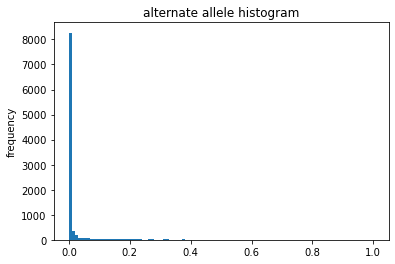

In [6]:
# create a plot
fig, ax = plt.subplots()


ax.set_title('alternate allele histogram')
ax.set_ylabel('frequency')

ax.hist(df_alelle_freq, bins = 100)

plt.show()


In [7]:
roi = df_alelle_freq < 0.95
roi2 = df_alelle_freq > 0.05

roi_cat = roi & roi2
roi_cat.value_counts()

df_subset = df_alelle_freq.loc[roi_cat]
df_subset

pca_input = df_removelables.loc[roi_cat]
pca_input




,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


# hist of subset

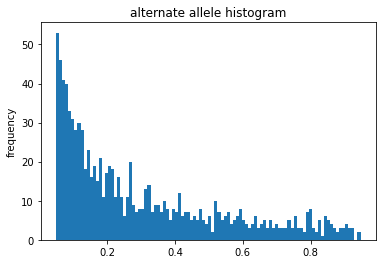

In [8]:
fig, ax1 = plt.subplots()


ax1.set_title('alternate allele histogram')
ax1.set_ylabel('frequency')

ax1.hist(df_subset, bins = 100)

plt.show()

In [9]:
pca_input = pca_input.transpose()
pca_input


,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


In [10]:
pca_input.mean(axis = 0)

20      0.160518
32      1.191523
38      0.811224
41      0.188776
46      0.195055
          ...   
9957    1.683673
9959    0.231947
9974    0.361460
9975    1.620094
9980    0.155416
Length: 986, dtype: float64

In [11]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)

array([-1.56424673e-16, -6.55327876e-16,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  5.70536118e-16,  1.65749152e-16,
        2.45835098e-16,  2.91847481e-16, -6.09446211e-16, -1.71966924e-15,
        1.30866777e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  1.09048476e-15,  5.13979231e-16,
        1.90010226e-15,  3.07794955e-16,  1.41814870e-15,  2.18210240e-16,
        1.21828241e-16, -2.11726677e-15,  1.54158911e-16, -3.32805473e-16,
       -1.36189682e-15, -3.84264398e-16,  1.92110413e-16,  2.84091606e-16,
       -3.47184343e-16,  2.08206032e-15, -4.99861795e-16, -1.89713934e-15,
       -1.42045803e-16, -8.29878639e-16,  2.96379004e-16,  3.13546503e-16,
       -5.90753680e-16, -2.23621923e-15, -6.62038016e-16, -1.99674570e-15,
       -2.44266494e-16, -1.29531829e-15, -5.92017278e-16,  1.59069513e-15,
       -3.25398177e-16, -9.36957646e-16, -7.13496940e-16,  3.40866355e-16,
        1.77016957e-15,  

In [12]:
pca_input_standardized.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [13]:
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[-6.14493037, -9.81856684, -1.54660364, ..., -2.35763055,
        -3.54938294, -2.127275  ],
       [-6.13388414, -8.6318291 ,  2.55741676, ..., -4.30826831,
        -0.53012194,  2.8623027 ],
       [-6.23847319, -7.97187001, -0.74580331, ...,  2.15943795,
         1.38002832, -1.55110792],
       ...,
       [-4.09694721, -2.82736141, -4.18035282, ...,  1.6278556 ,
         3.5205689 ,  0.4945426 ],
       [-6.26346243, -2.58507978, -4.22546851, ...,  2.04565097,
         0.63082246,  2.14717711],
       [-3.17677867, -0.91694979, -6.45070776, ..., -2.53782851,
         2.24589018,  1.24528933]])

In [14]:
pca_output.shape

(2548, 10)

In [15]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546604,-5.396068,-0.520200,-0.127593,1.926438,-2.357631,-3.549383,-2.127275
1,-6.133884,-8.631829,2.557417,-3.897995,0.328043,-2.339530,-0.983174,-4.308268,-0.530122,2.862303
2,-6.238473,-7.971870,-0.745803,-4.016937,-0.934071,3.999981,0.900328,2.159438,1.380028,-1.551108
3,-5.051218,-7.008727,2.805047,-4.764978,4.377232,0.148554,0.364340,2.663749,2.192279,-2.043723
4,-6.634383,-8.543670,3.071995,-1.594599,-4.369640,0.907564,2.714242,2.981452,0.617041,1.479264
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665242,3.299118,-0.200111,-0.514906,-2.185028,-0.407522,-0.207259,1.883931
2544,-6.295888,-3.116492,-5.555646,3.334365,3.341658,3.610223,0.792782,3.127938,-1.037646,2.211226
2545,-4.096947,-2.827361,-4.180353,3.694645,1.554422,0.375060,-1.664847,1.627856,3.520569,0.494543
2546,-6.263462,-2.585080,-4.225469,3.893012,-3.928520,-1.808654,-1.137424,2.045651,0.630822,2.147177


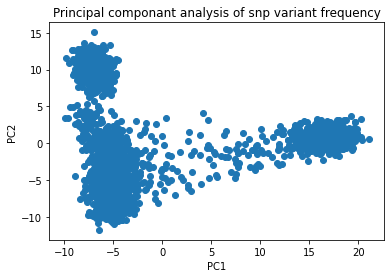

In [16]:
fig, ax = plt.subplots()

ax.set_title("Principal Componant Analysis of SNP Variant Frequency")
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])


In [17]:
pca_output_df['SAMPID'] = pca_input.index
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SAMPID
0,-6.144930,-9.818567,-1.546604,-5.396068,-0.520200,-0.127593,1.926438,-2.357631,-3.549383,-2.127275,HG00096
1,-6.133884,-8.631829,2.557417,-3.897995,0.328043,-2.339530,-0.983174,-4.308268,-0.530122,2.862303,HG00097
2,-6.238473,-7.971870,-0.745803,-4.016937,-0.934071,3.999981,0.900328,2.159438,1.380028,-1.551108,HG00099
3,-5.051218,-7.008727,2.805047,-4.764978,4.377232,0.148554,0.364340,2.663749,2.192279,-2.043723,HG00100
4,-6.634383,-8.543670,3.071995,-1.594599,-4.369640,0.907564,2.714242,2.981452,0.617041,1.479264,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665242,3.299118,-0.200111,-0.514906,-2.185028,-0.407522,-0.207259,1.883931,NA21137
2544,-6.295888,-3.116492,-5.555646,3.334365,3.341658,3.610223,0.792782,3.127938,-1.037646,2.211226,NA21141
2545,-4.096947,-2.827361,-4.180353,3.694645,1.554422,0.375060,-1.664847,1.627856,3.520569,0.494543,NA21142
2546,-6.263462,-2.585080,-4.225469,3.893012,-3.928520,-1.808654,-1.137424,2.045651,0.630822,2.147177,NA21143
